#Data Preparation
---



In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras import layers, models

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(f'There are {np.isnan(train_images).sum()} null values present in train_images')
print(f'There are {np.isnan(test_images).sum()} null values present in test_images')
print(f'There are {np.isnan(train_labels).sum()} null values present in train_labels')
print(f'There are {np.isnan(test_labels).sum()}  null values present in test_labels')

There are 0 null values present in train_images
There are 0 null values present in test_images
There are 0 null values present in train_labels
There are 0  null values present in test_labels


In [4]:
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [5]:
x_train,val_X,y_train,val_y = train_test_split(train_images,train_labels,test_size = 0.2) #Data Splitting



# Exploratory Data Analysis (EDA)

In [6]:
print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [7]:
print("X Train data shape:", x_train.shape) #Printing the training and validation data shapes
print("Y Train labels shape:", val_X.shape)

X Train data shape: (48000, 28, 28)
Y Train labels shape: (12000, 28, 28)


In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


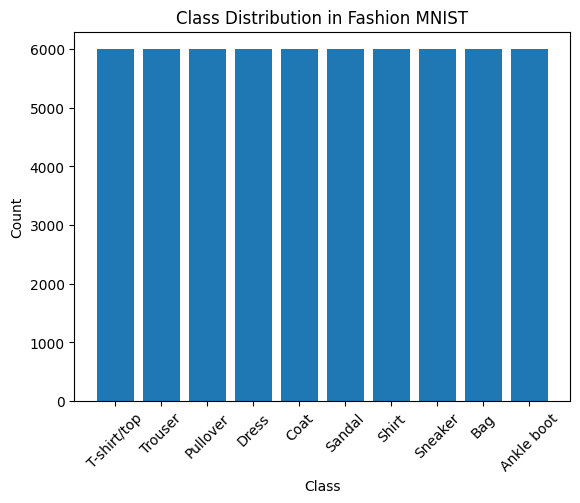

Class-wise Distribution:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


In [9]:
#Printing the plots of classwise distribuition
class_distribution = np.bincount(train_labels)
classes = [class_names[i] for i in range(10)]
plt.bar(classes, class_distribution)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Class Distribution in Fashion MNIST')
plt.show()
classes = [class_names[i] for i in range(10)]
print("Class-wise Distribution:")
for class_name, count in zip(classes, class_distribution):
    print(f"{class_name}: {count}")

In [10]:
classes = [class_names[i] for i in range(10)]
print("Class-wise Distribution:")
for class_name, count in zip(classes, class_distribution):
    print(f"{class_name}: {count}")



Class-wise Distribution:
T-shirt/top: 6000
Trouser: 6000
Pullover: 6000
Dress: 6000
Coat: 6000
Sandal: 6000
Shirt: 6000
Sneaker: 6000
Bag: 6000
Ankle boot: 6000


In [11]:
# Descriptive Statistics

x_train_reshaped = x_train.reshape(-1)
val_X_reshaped = val_X.reshape(-1)
mean_x_train = np.mean(x_train_reshaped)
mean_val_X = np.mean(val_X_reshaped)
std_dev_x_train = np.std(x_train_reshaped)
std_dev_val_X = np.std(val_X_reshaped)
min_x_train = np.min(x_train_reshaped)
max_x_train = np.max(x_train_reshaped)
min_val_X = np.min(val_X_reshaped)
max_val_X = np.max(val_X_reshaped)
print(f"x_train Mean: {mean_x_train}, Standard Deviation: {std_dev_x_train}, Min: {min_x_train}, Max: {max_x_train}")
print(f"val_X Mean: {mean_val_X}, Standard Deviation: {std_dev_val_X}, Min: {min_val_X}, Max: {max_val_X}")


x_train Mean: 72.91825425170067, Standard Deviation: 90.00135573772651, Min: 0, Max: 255
val_X Mean: 73.02874415391156, Standard Deviation: 90.10039097975515, Min: 0, Max: 255


## PIXEL VALUES DISTRIBUITON
---



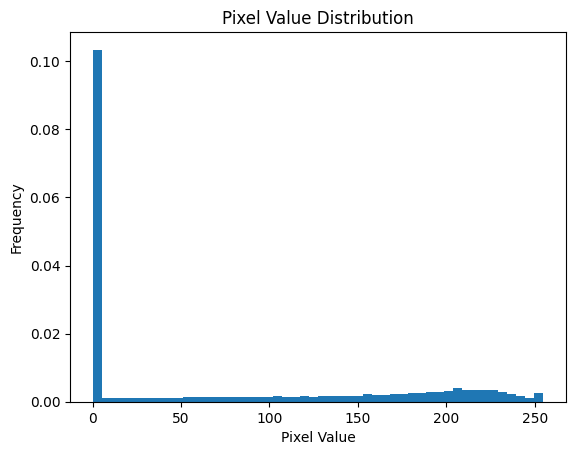

In [12]:
plt.hist(x_train.flatten(), bins=50, range=(0, 255), density=True)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [13]:
image_sizes = np.array([img.shape for img in x_train])
image_sizes


array([[28, 28],
       [28, 28],
       [28, 28],
       ...,
       [28, 28],
       [28, 28],
       [28, 28]])

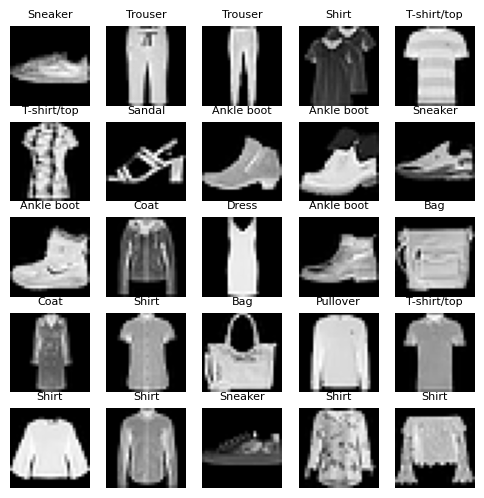

In [14]:
#Plloting few images from the dataset
plt.figure(figsize=(6, 6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]],fontsize=8)
    plt.axis('off')
plt.show()

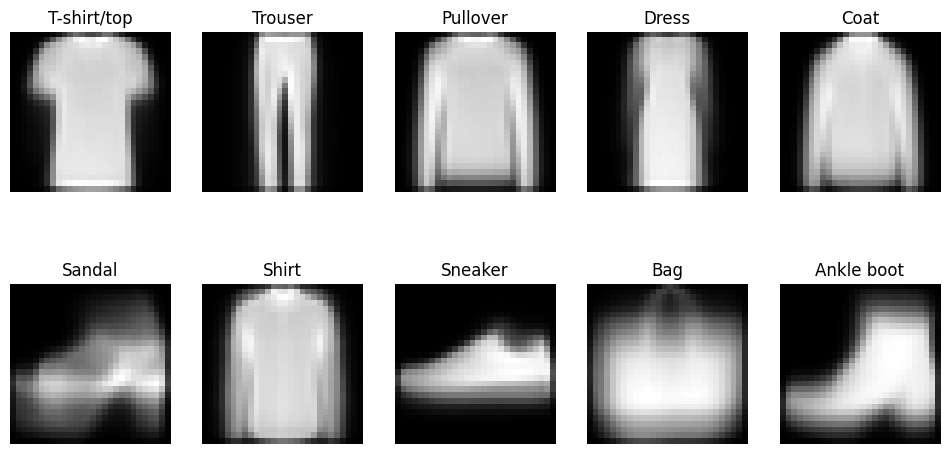

In [15]:
#plotting the mean of each class
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    class_images = x_train[y_train == i]
    mean_image = np.mean(class_images, axis=0)
    plt.imshow(mean_image, cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.show()

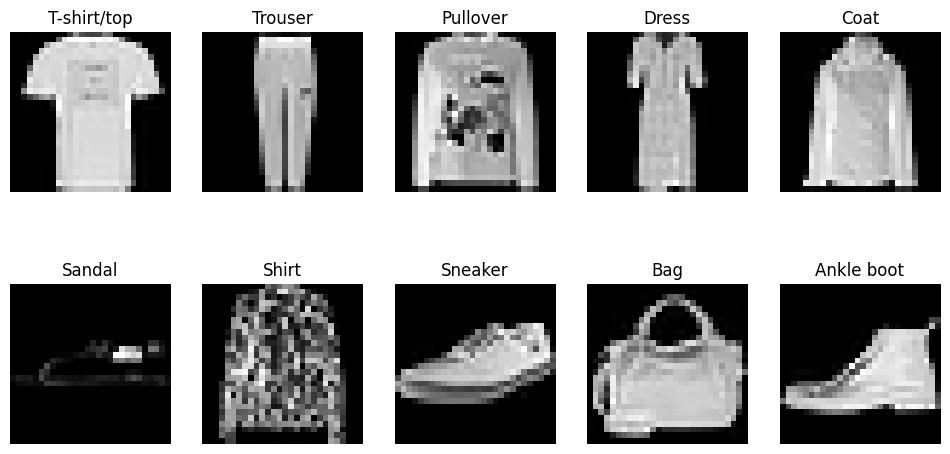

In [16]:
#plotting one one image from each class
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    class_images = x_train[y_train == i]
    random_index = np.random.randint(0, len(class_images))
    plt.imshow(class_images[random_index], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')

plt.show()

In [17]:
train_images = train_images/255.0 #Data Normalisation

In [18]:
# Checking the training and validation data samples

y_train_flat = y_train.flatten()
val_y_flat = val_y.flatten()

# Count the occurrences of each class in the training set
train_counts = np.bincount(y_train_flat)

# Count the occurrences of each class in the validation set
val_counts = np.bincount(val_y_flat)

# Print the counts for each class
for class_label, count in enumerate(train_counts):
    print(f'Training Set - Class {class_label}: {count} samples')

for class_label, count in enumerate(val_counts):
    print(f'Validation Set - Class {class_label}: {count} samples')

Training Set - Class 0: 4778 samples
Training Set - Class 1: 4785 samples
Training Set - Class 2: 4848 samples
Training Set - Class 3: 4786 samples
Training Set - Class 4: 4812 samples
Training Set - Class 5: 4823 samples
Training Set - Class 6: 4781 samples
Training Set - Class 7: 4781 samples
Training Set - Class 8: 4797 samples
Training Set - Class 9: 4809 samples
Validation Set - Class 0: 1222 samples
Validation Set - Class 1: 1215 samples
Validation Set - Class 2: 1152 samples
Validation Set - Class 3: 1214 samples
Validation Set - Class 4: 1188 samples
Validation Set - Class 5: 1177 samples
Validation Set - Class 6: 1219 samples
Validation Set - Class 7: 1219 samples
Validation Set - Class 8: 1203 samples
Validation Set - Class 9: 1191 samples


#MODEL SELECTION AND EXPERIMENTS

##  ARTIFICIAL NUERAL NETWORK MODEL

BASE ANN MODEL

In [19]:

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
x_train,val_X,y_train,val_y = train_test_split(train_images,train_labels,test_size = 0.2)


In [20]:
def base_model():
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  print(model.summary())
  return model


In [21]:
model = base_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, verbose=2,validation_data=(val_X,val_y))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
1500/1500 - 9s - loss: 0.5227 - accuracy: 0.8197 - val_loss: 0.4360 - val_accuracy: 0.8472 - 9s/epoch - 6ms/step
Epoch 2/20
1500/1500 - 4s - loss: 0.3920 - accuracy: 0.8602 - val_loss: 0.3706 - val_accuracy: 0.8662 - 4s/epoch - 2ms/step
Epoch 3/20
1500/1500 - 5s -

### EXPERIMENTING WITH DIFFERENT NUMBER OF LAYERS KEEPING OTHER PARAMETERS CONSTANT

In [22]:
def model_experiment_number_of_layers(number_of_layers):
  plt.figure(figsize=(8, 8))
  print(f'------ Model details with number of layers : {number_of_layers}------')
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  for i in range(number_of_layers):
    model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  print(model.summary())
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train, y_train, epochs=20, verbose=2,validation_data=(val_X,val_y))
  plt.plot(history.history['accuracy'], 'green')
  plt.plot(history.history['val_accuracy'],'red')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.xticks(range(1, 21))
  plt.title(f' Plot for layers : {number_of_layers}')
  plt.legend(['train', 'validate'], loc='upper left')
  plt.show()
  print('\n')
  history_df = pd.DataFrame(history.history)
  history_df['Layers'] = number_of_layers
  history_df['Epoch'] = history_df.index + 1

  return history,history_df
  # return history.history['accuracy'] , history.history['val_accuracy']



------ Model details with number of layers : 1------
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/20
1500/1500 - 6s - loss: 0.5218 - accuracy: 0.8172 - val_loss: 0.4372 - val_accuracy: 0.8440 - 6s/epoch - 4ms/step
Epoch 2/20
1500/1500 - 4s - loss: 0.3903 - accuracy: 0.8602 - val_loss: 0.3552 - val_accuracy: 0

<Figure size 800x800 with 0 Axes>

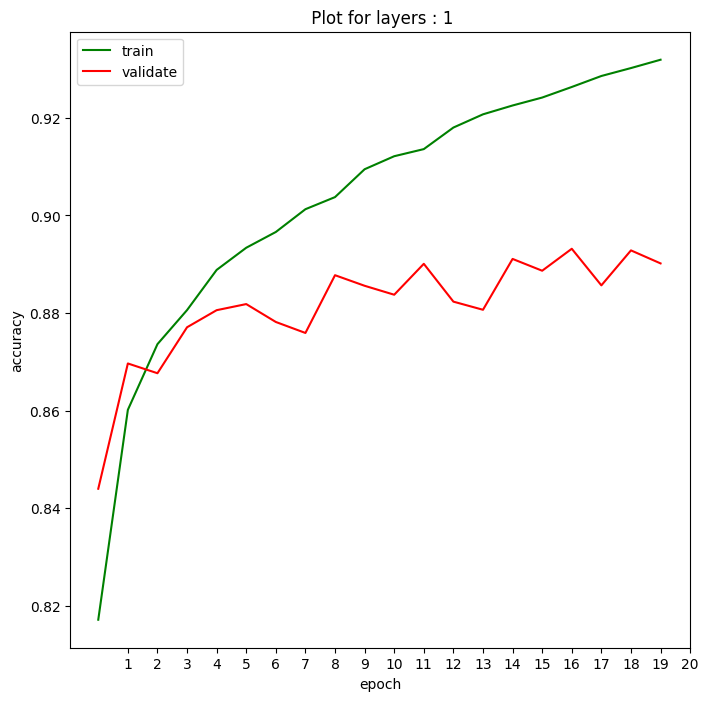



------ Model details with number of layers : 3------
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________

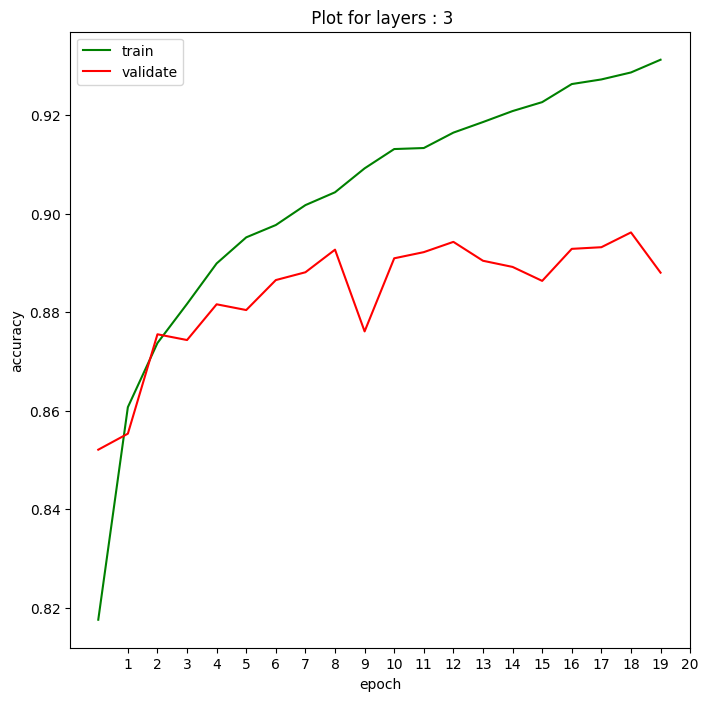



------ Model details with number of layers : 5------
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 

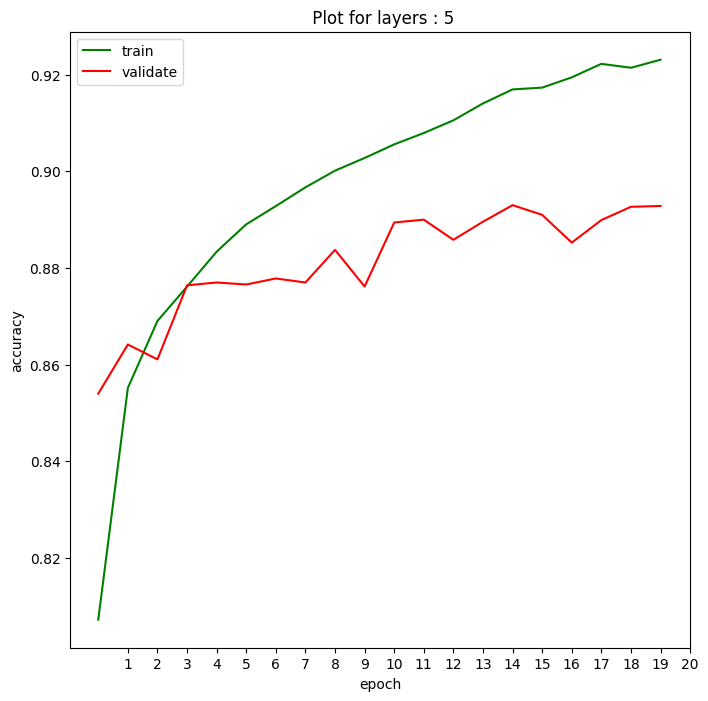



------ Model details with number of layers : 7------
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 

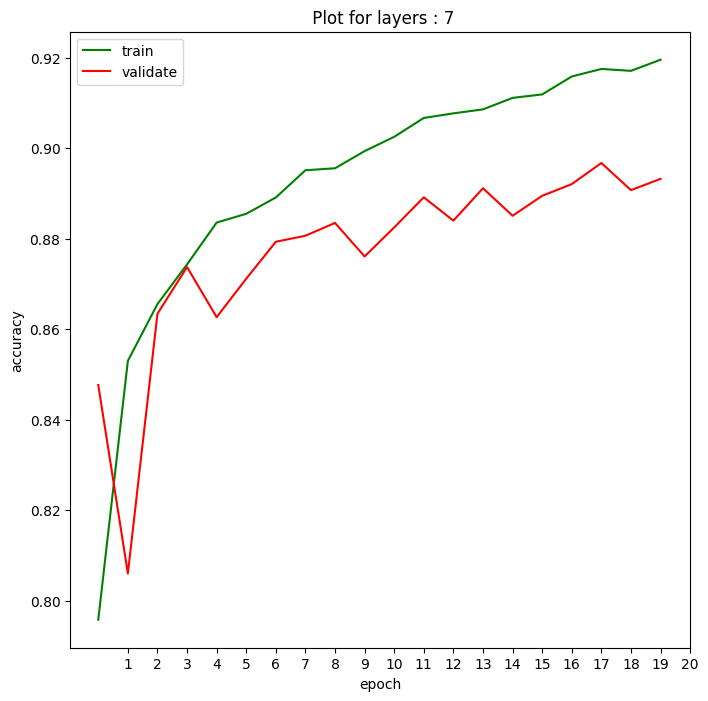



------ Model details with number of layers : 9------
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               100480    
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dense_25 (Dense)            (None, 128)               16512     
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 

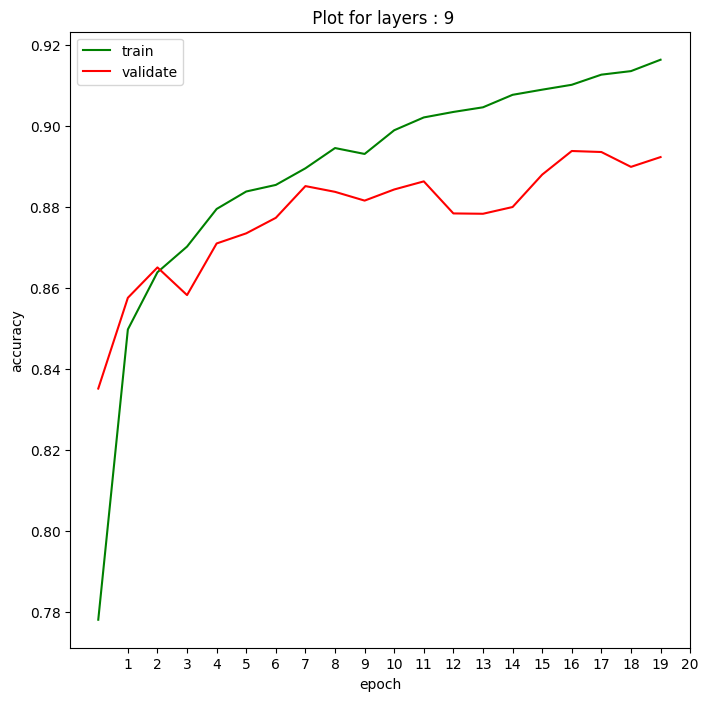

In [23]:
layers_list = [1,3,5,7,9]
plt.figure(figsize=(8, 8))
accuracies_list = []
val_accuracies = []
all_histories = []
best_model = None
best_accuracy = 0
best_loss = float('inf')
optimal_layers = 1
for layers_number in layers_list:

  history,history_df = model_experiment_number_of_layers(layers_number)
  val_accuracy = history.history['val_accuracy'][-1]
  val_loss = history.history['val_loss'][-1]
  all_histories.append(history_df)
  if val_accuracy > best_accuracy or (val_accuracy == best_accuracy and val_loss < best_loss):
      best_accuracy = val_accuracy
      best_loss = val_loss
      optimal_layers = layers_number



all_histories_df = pd.concat(all_histories, ignore_index=True)



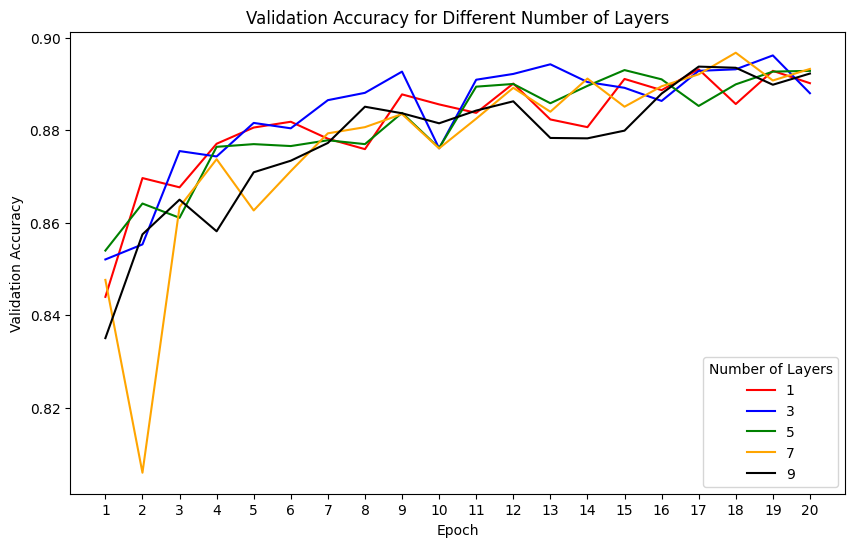

In [24]:
all_histories_df = pd.concat(all_histories, ignore_index=True)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Epoch', y='val_accuracy', hue='Layers', data=all_histories_df,palette=['red', 'blue', 'green', 'orange','black'])

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.xticks(range(1, 21))
plt.title('Validation Accuracy for Different Number of Layers')
plt.legend(title='Number of Layers')
plt.show()

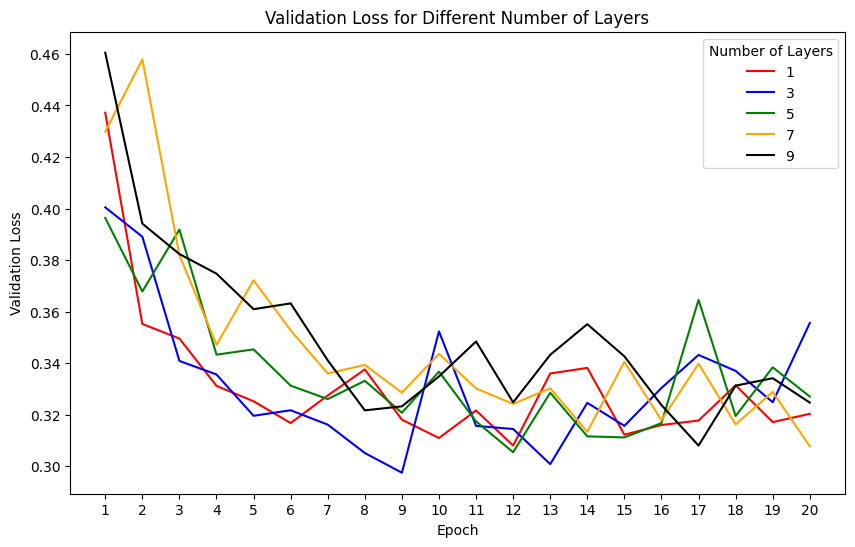

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Epoch', y='val_loss', hue='Layers', data=all_histories_df,palette=['red', 'blue', 'green', 'orange','black'])

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss for Different Number of Layers')
plt.xticks(range(1, 21))
plt.legend(title='Number of Layers')
plt.show()

### EXPERIMENTING WITH LEARNING RATES


In [26]:
def build_model(num_layers):
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  for i in range(num_layers):
    model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model


In [27]:
def find_optimal_learning_rate(num_layers, x_train, y_train,learning_rate):

    model = build_model(num_layers)
    print(model.summary())

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


    history = model.fit(x_train, y_train, epochs=20, validation_data=(val_X, val_y), verbose=2)


    plt.figure(figsize=(10, 6))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Epoch-wise Curves - {num_layers} Layers, LR={learning_rate}')
    plt.legend()
    plt.xticks(range(1, 21))

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Epoch-wise Curves - {num_layers} Layers, LR={learning_rate}')
    plt.legend()
    plt.xticks(range(1, 21))

    plt.tight_layout()
    plt.show()


------Experimenting with Learning Rate -  0.01 ------
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               100480    
                                                                 
 dense_33 (Dense)            (None, 128)               16512     
                                                                 
 dense_34 (Dense)            (None, 128)               16512     
                                                                 
 dense_35 (Dense)            (None, 128)               16512     
                                                                 
 dense_36 (Dense)            (None, 128)               16512     
                                                                 


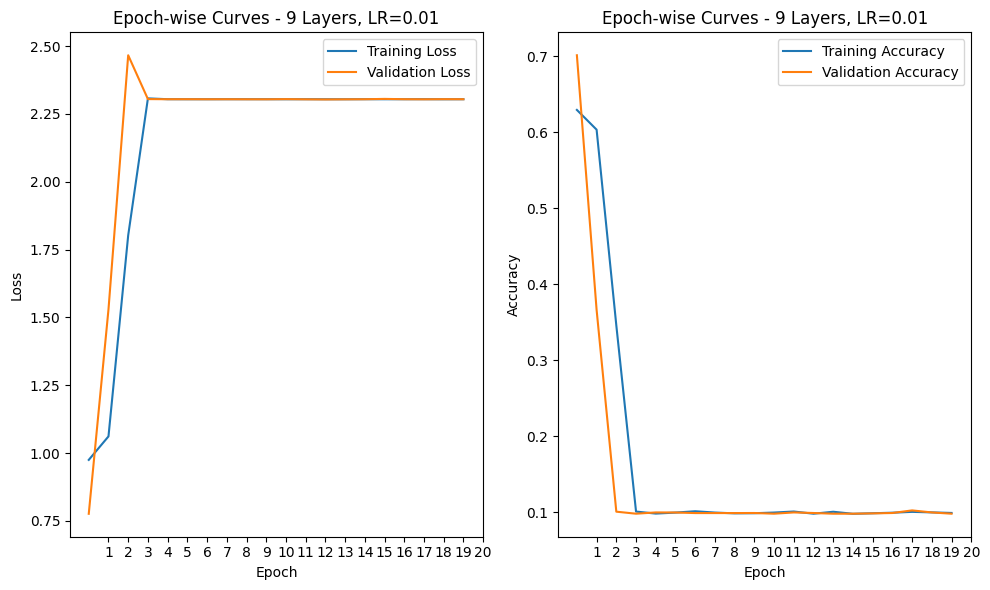

------Experimenting with Learning Rate -  0.001 ------
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 128)               100480    
                                                                 
 dense_43 (Dense)            (None, 128)               16512     
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                                 
 dense_45 (Dense)            (None, 128)               16512     
                                                                 
 dense_46 (Dense)            (None, 128)               16512     
                                                                 

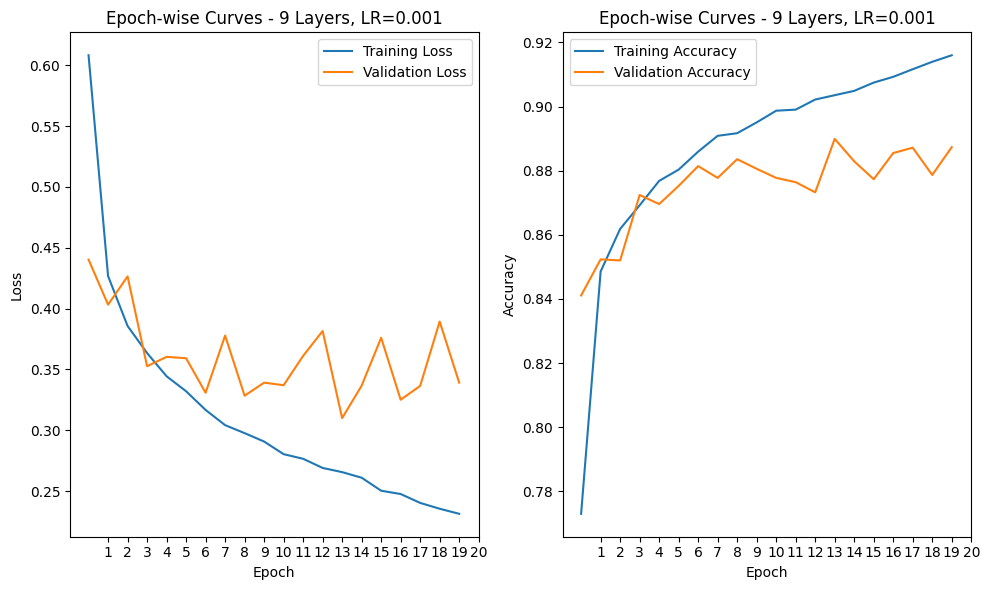

------Experimenting with Learning Rate -  0.0001 ------
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 128)               100480    
                                                                 
 dense_53 (Dense)            (None, 128)               16512     
                                                                 
 dense_54 (Dense)            (None, 128)               16512     
                                                                 
 dense_55 (Dense)            (None, 128)               16512     
                                                                 
 dense_56 (Dense)            (None, 128)               16512     
                                                                

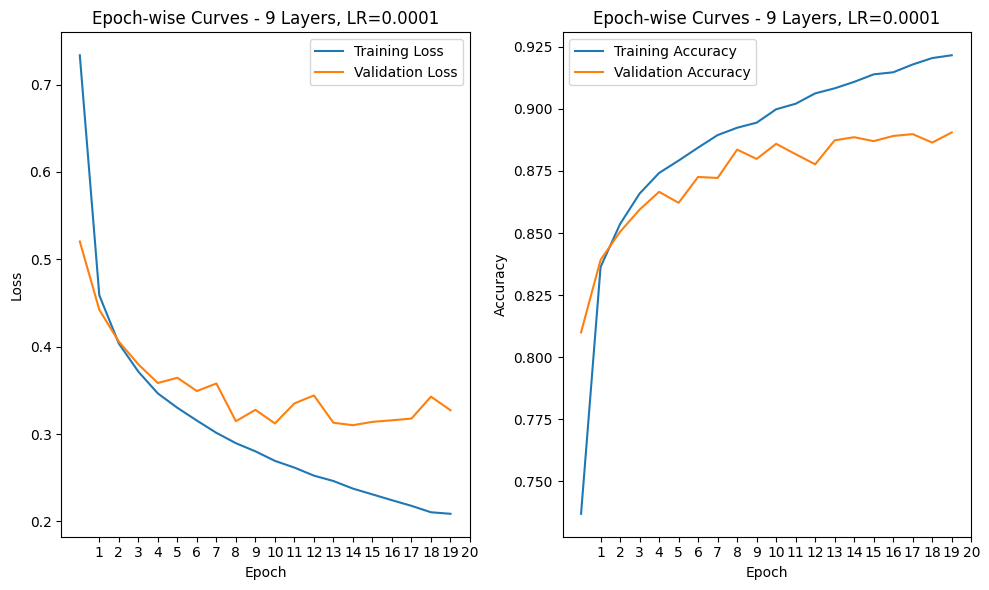

------Experimenting with Learning Rate -  1e-05 ------
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_62 (Dense)            (None, 128)               100480    
                                                                 
 dense_63 (Dense)            (None, 128)               16512     
                                                                 
 dense_64 (Dense)            (None, 128)               16512     
                                                                 
 dense_65 (Dense)            (None, 128)               16512     
                                                                 
 dense_66 (Dense)            (None, 128)               16512     
                                                                 

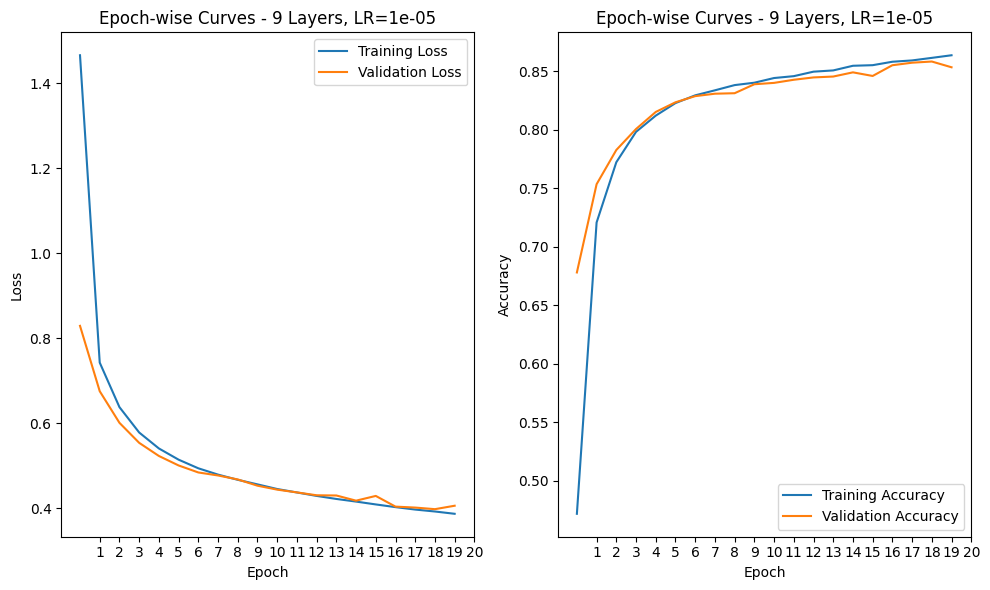

In [28]:
learning_rates = [0.01,1e-3, 1e-4, 1e-5]
for lr in learning_rates:
  print(f'------Experimenting with Learning Rate -  {lr} ------')
  find_optimal_learning_rate(9,x_train,y_train,lr)

It is visible that 1e-5 is the most optimal learning rate here, the most optimlal number of layers is 9 . Now lets test with different epochs

### EXPERIMENTING WITH EPOCHS

After tuning for the optimal learning rate , optimal number of hidden layers , let us tune for epochs .

In [29]:
def build_model(num_layers):
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  for i in range(num_layers):
    model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model


In [30]:
model = build_model(9)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, verbose=2, validation_data=(val_X, val_y))

Epoch 1/50
1500/1500 - 9s - loss: 1.4356 - accuracy: 0.5093 - val_loss: 0.8881 - val_accuracy: 0.6586 - 9s/epoch - 6ms/step
Epoch 2/50
1500/1500 - 9s - loss: 0.7966 - accuracy: 0.7112 - val_loss: 0.7273 - val_accuracy: 0.7321 - 9s/epoch - 6ms/step
Epoch 3/50
1500/1500 - 6s - loss: 0.6872 - accuracy: 0.7548 - val_loss: 0.6519 - val_accuracy: 0.7603 - 6s/epoch - 4ms/step
Epoch 4/50
1500/1500 - 7s - loss: 0.6260 - accuracy: 0.7749 - val_loss: 0.6072 - val_accuracy: 0.7756 - 7s/epoch - 4ms/step
Epoch 5/50
1500/1500 - 6s - loss: 0.5842 - accuracy: 0.7906 - val_loss: 0.5698 - val_accuracy: 0.7942 - 6s/epoch - 4ms/step
Epoch 6/50
1500/1500 - 7s - loss: 0.5543 - accuracy: 0.8040 - val_loss: 0.5444 - val_accuracy: 0.8056 - 7s/epoch - 5ms/step
Epoch 7/50
1500/1500 - 7s - loss: 0.5304 - accuracy: 0.8116 - val_loss: 0.5186 - val_accuracy: 0.8177 - 7s/epoch - 4ms/step
Epoch 8/50
1500/1500 - 7s - loss: 0.5106 - accuracy: 0.8201 - val_loss: 0.5046 - val_accuracy: 0.8202 - 7s/epoch - 4ms/step
Epoch 9/

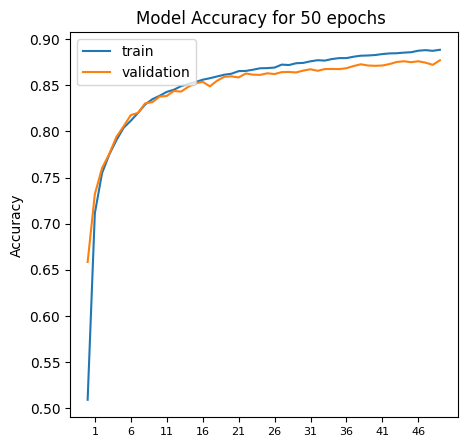

In [31]:
plt.figure(figsize=(5, 5))
tick_labels = [str(i) for i in range(1, len(history.history['accuracy']) + 1, 5)]

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for 50 epochs ')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, len(history.history['loss']) + 1, step=5), fontsize=8)  # Adjust the fontsize as needed
tick_positions = np.arange(1, len(history.history['accuracy']) + 1, step=5)
# Manually set the tick positions and labels
plt.gca().set_xticks(tick_positions)
plt.gca().set_xticklabels(tick_labels)

plt.legend(['train', 'validation'], loc='upper left')
plt.show()


The parameters seem to stabilsie after 20 epochs. Anything after this seems to be overfiitnig. Let us now experiment our code with final model

### FINAL ANN MODEL


In [32]:
def build_model(num_layers):
  model = tf.keras.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  for i in range(num_layers):
    model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model


In [33]:
learning_rate = 1e-5
epochs = 20
model_final = build_model(9)
model_final.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_final.fit(train_images, train_labels, epochs=20, validation_split=0.2)
test_loss, test_acc = model_final.evaluate(test_images, test_labels)



Epoch 1/20
1500/1500 [==============================] - 11s 5ms/step - loss: 1.4959 - accuracy: 0.4537 - val_loss: 0.8816 - val_accuracy: 0.6601
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.7937 - accuracy: 0.6987 - val_loss: 0.7078 - val_accuracy: 0.7442
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6663 - accuracy: 0.7610 - val_loss: 0.6170 - val_accuracy: 0.7772
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5959 - accuracy: 0.7819 - val_loss: 0.5716 - val_accuracy: 0.7890
Epoch 5/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.5586 - accuracy: 0.7928 - val_loss: 0.5455 - val_accuracy: 0.7962
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5345 - accuracy: 0.8026 - val_loss: 0.5287 - val_accuracy: 0.8004
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.5173 - accuracy: 0.8108 - val_loss: 0.5175 - val_accuracy

### **VALIDATION** METRICS SUCH AS ACCURACY,F1 SCORE ETC


In [34]:
test_loss, test_acc = model_final.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 78.5021 - accuracy: 0.8022


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

y_pred_prob = model_final.predict(test_images)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate additional metrics
precision = precision_score(test_labels, y_pred, average='weighted')
recall = recall_score(test_labels, y_pred, average='weighted')
f1 = f1_score(test_labels, y_pred, average='weighted')

# Display additional metrics
print("Final Model - Precision:", precision * 100)
print("Final Model - Recall:", recall * 100)
print("Final Model - F1 Score:", f1 * 100)
print("Final Model - F1 Score:", f1 * 100)

313/313 [==============================] - 1s 2ms/step
Final Model - Precision: 81.83287541805905
Final Model - Recall: 80.22
Final Model - F1 Score: 79.8237213430703
Final Model - F1 Score: 79.8237213430703


Confusion Matrix:
[[696   2  21  64  27   0 167   1  22   0]
 [  0 960   1  19  17   0   0   0   3   0]
 [  4   2 588   7 345   0  42   0  12   0]
 [ 16  34  14 796 112   0  20   0   8   0]
 [  0   2  33   8 935   0   9   0  13   0]
 [  0   0   0   1   0 834   0  79   4  82]
 [101   3 100  40 350   0 363   0  43   0]
 [  0   0   0   0   0   7   0 913   0  80]
 [  0   1   3   3  11   2   8   7 965   0]
 [  0   0   0   0   0   0   0  25   3 972]]


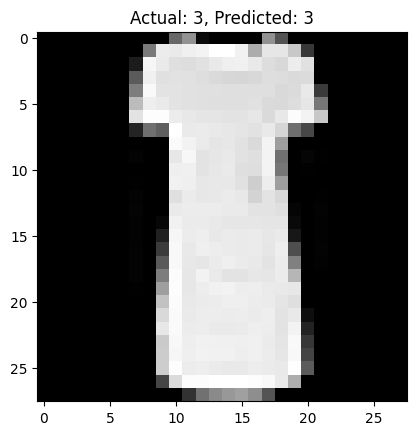

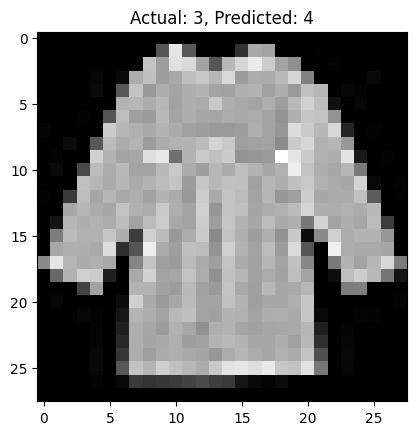

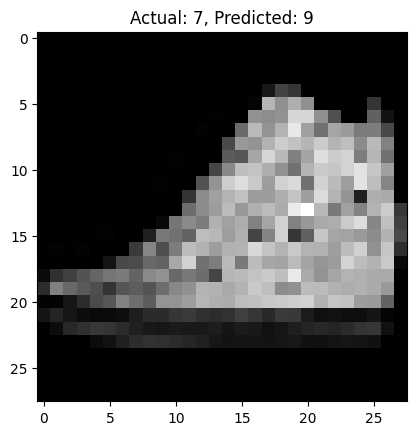

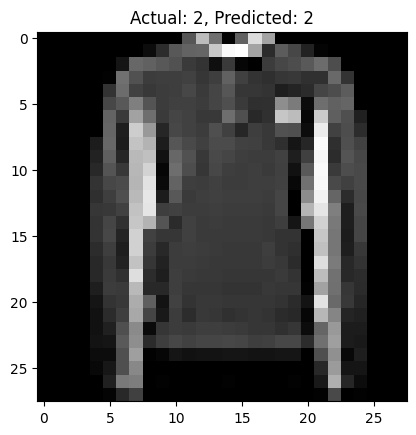

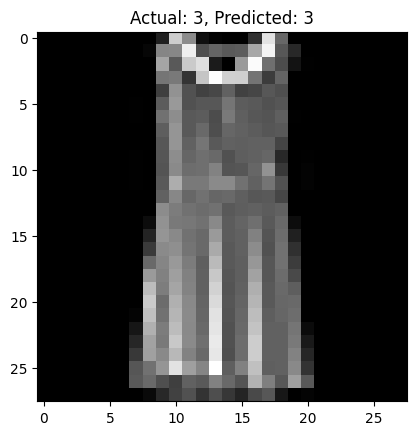

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

conf_matrix = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display some predictions vs actual class
num_samples_to_display = 5
sample_indices = np.random.choice(len(test_labels), num_samples_to_display, replace=False)

for i in sample_indices:
    actual_class = test_labels[i]
    predicted_class = y_pred[i]

    plt.imshow(test_images[i].reshape((28, 28)), cmap='gray')
    plt.title(f"Actual: {actual_class}, Predicted: {predicted_class}")
    plt.show()

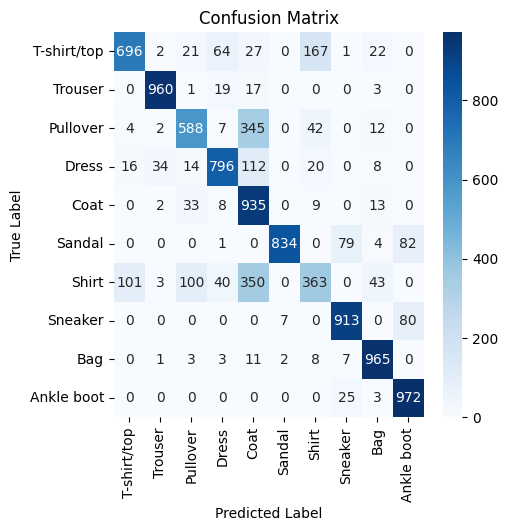

In [37]:
conf_matrix = confusion_matrix(test_labels, y_pred)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##CNN


In [38]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()





x_train, val_X, y_train, val_y = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


x_train = x_train.reshape((-1,28,28,1)).astype('float32') / 255.0
val_X = val_X.reshape((-1,28,28,1)).astype('float32') / 255.0


y_train_df = pd.get_dummies(y_train, columns=[0], prefix='label')
y_val_df = pd.get_dummies(val_y, columns=[0], prefix='label')


test_images = test_images.reshape((-1,28,28,1)).astype('float32') / 255.0

test_labels = pd.get_dummies(test_labels, columns=[0], prefix='label')




Base CNN MODEL

In [39]:
def base_cnn_model():

  model = models.Sequential()
  model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.Dropout(0.5))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())

  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  print(model.summary())

  return model


In [40]:
model = base_cnn_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_df, epochs=15, verbose=2, validation_data=(val_X, y_val_df))


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 dropout (Dropout)           (None, 26, 26, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 flatten_12 (Flatten)        (None, 1352)              0         
                                                                 
 dense_92 (Dense)            (None, 128)               173184    
                                                                 
 dense_93 (Dense)            (None, 10)                1290      
                                                     

### EXPERIMENTING WITH OPITMAL NUMBER OF LAYERS

In [42]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

x_train, val_X, y_train, val_y = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


x_train = x_train.reshape((-1,28,28,1)).astype('float32') / 255.0
val_X = val_X.reshape((-1,28,28,1)).astype('float32') / 255.0


y_train_df = pd.get_dummies(y_train, columns=[0], prefix='label')
y_val_df = pd.get_dummies(val_y, columns=[0], prefix='label')


test_images = test_images.reshape((-1,28,28,1)).astype('float32') / 255.0

test_labels = pd.get_dummies(test_labels, columns=[0], prefix='label')




In [43]:


def model_experiment_layers_and_filters_varying(num_layers):
    plt.figure(figsize=(8, 8))
    print(f'------ Model details with {num_layers} layers and varying number of filters ------')

    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Dropout(0.5))


    for i in range(1, num_layers):
        model.add(layers.Conv2D(16 * i, (3, 3), activation='relu'))


    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    print(model.summary())

    return model

In [44]:


model = model_experiment_layers_and_filters_varying(1)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_df, epochs=15, verbose=2, validation_data=(val_X, y_val_df))


------ Model details with 1 layers and varying number of filters ------
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 dropout_1 (Dropout)         (None, 26, 26, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 8)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 1352)              0         
                                                                 
 dense_94 (Dense)            (None, 128)               173184    
                                                                 
 dense_95 (Dense)            (None, 10)        

<Figure size 800x800 with 0 Axes>

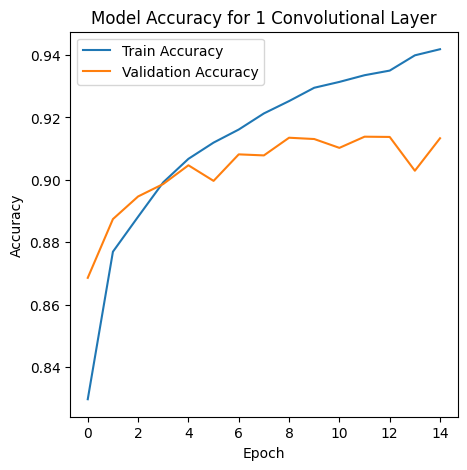

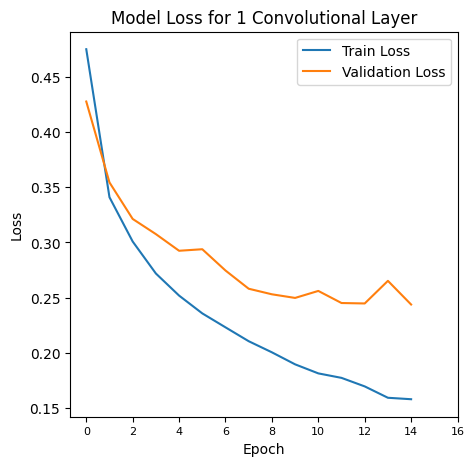

In [45]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for 1 Convolutional Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss for 1 Convolutional Layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
# plt.xticks(np.arange(0, len(history.history['loss']),step=5)), fontsize=8)
plt.xticks(np.arange(0, len(history.history['loss']) + 2, step=2), fontsize=8)  #

plt.show()


In [46]:
model = model_experiment_layers_and_filters_varying(2)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_df, epochs=15, verbose=2, validation_data=(val_X, y_val_df))



------ Model details with 2 layers and varying number of filters ------
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 dropout_2 (Dropout)         (None, 26, 26, 8)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 2304)              0         
                                                                 
 dense_96 (Dense)            (None, 128)       

<Figure size 800x800 with 0 Axes>

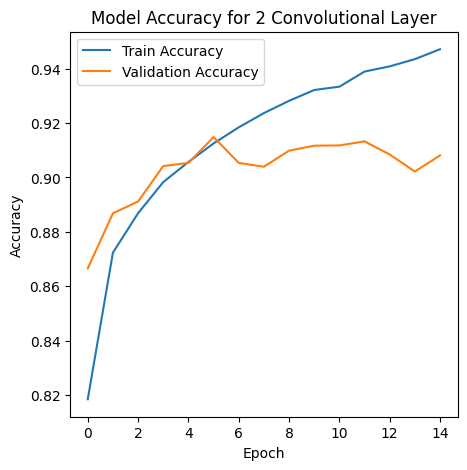

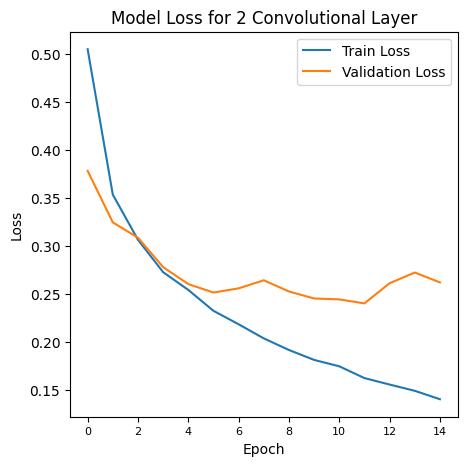

In [47]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for 2 Convolutional Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss for 2 Convolutional Layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
# plt.xticks(np.arange(0, len(history.history['loss']),step=5)), fontsize=8)
plt.xticks(np.arange(0, len(history.history['loss']) , step=2), fontsize=8)  #

plt.show()


In [48]:
model = model_experiment_layers_and_filters_varying(3)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_df, epochs=15, verbose=2, validation_data=(val_X, y_val_df))

------ Model details with 3 layers and varying number of filters ------
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 dropout_3 (Dropout)         (None, 26, 26, 8)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 conv2d_6 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 3872)      

<Figure size 800x800 with 0 Axes>

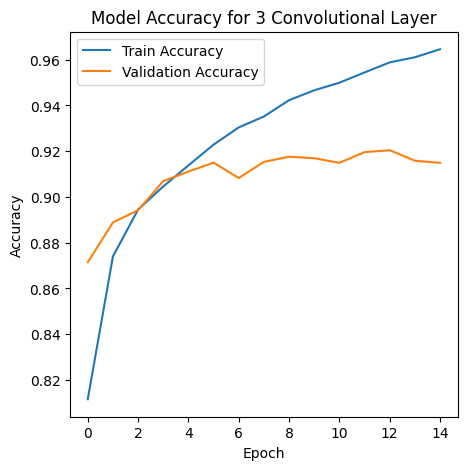

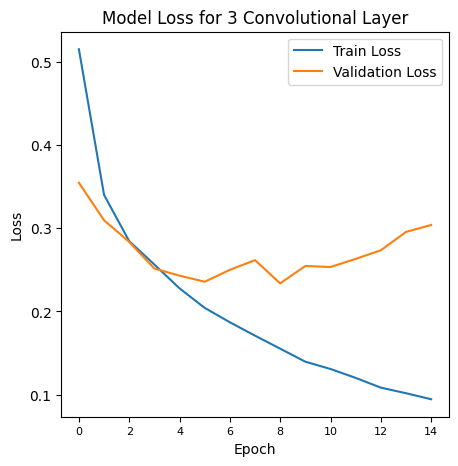

In [49]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for 3 Convolutional Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss for 3 Convolutional Layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
# plt.xticks(np.arange(0, len(history.history['loss']),step=5)), fontsize=8)
plt.xticks(np.arange(0, len(history.history['loss']) , step=2), fontsize=8)  #

plt.show()


In [50]:
model = model_experiment_layers_and_filters_varying(4)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_df, epochs=15, verbose=2, validation_data=(val_X, y_val_df))

------ Model details with 4 layers and varying number of filters ------
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 dropout_4 (Dropout)         (None, 26, 26, 8)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 conv2d_9 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 48)        13872     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 48)        0         
 g2D)                                          

<Figure size 800x800 with 0 Axes>

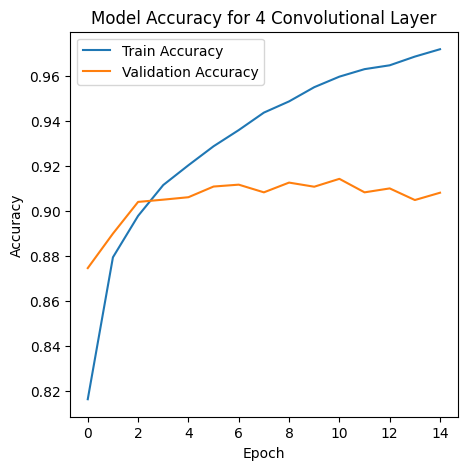

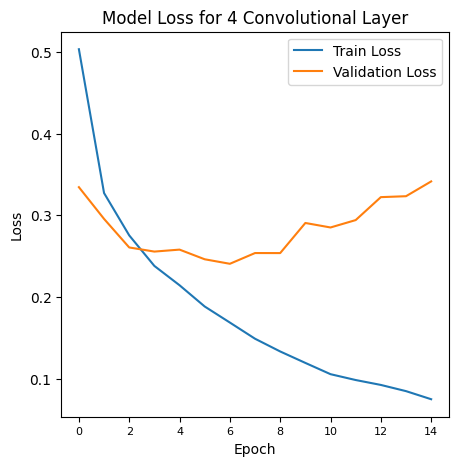

In [51]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy for 4 Convolutional Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss for 4 Convolutional Layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
# plt.xticks(np.arange(0, len(history.history['loss']),step=5)), fontsize=8)
plt.xticks(np.arange(0, len(history.history['loss']) , step=2), fontsize=8)  #

plt.show()


### TUNING FOR OPTIMAL LEARNING RATE

In [52]:
def build_model_cnn(num_layers):
    plt.figure(figsize=(4, 4))

    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Dropout(0.5))


    for i in range(1, num_layers):
        model.add(layers.Conv2D(16 * i, (3, 3), activation='relu'))



    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    print(model.summary())

    return model

------Experimenting with Learning Rate -  0.01 ------
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 dropout_5 (Dropout)         (None, 26, 26, 8)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 3872)              0         

<Figure size 400x400 with 0 Axes>

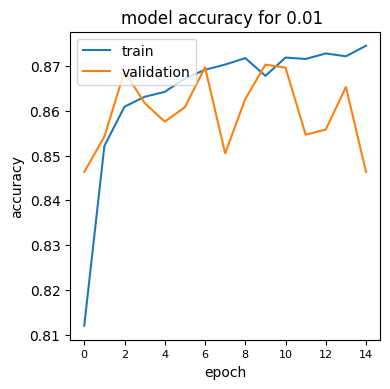

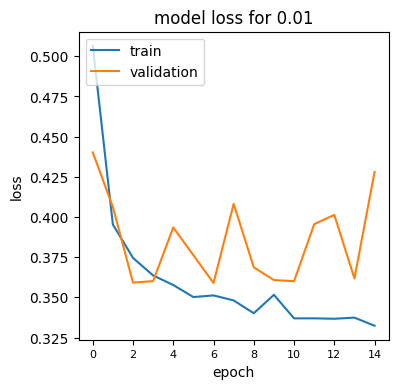

------Experimenting with Learning Rate -  0.001 ------
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 dropout_6 (Dropout)         (None, 26, 26, 8)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 3872)              0        

<Figure size 400x400 with 0 Axes>

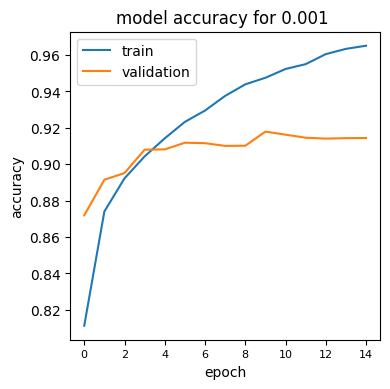

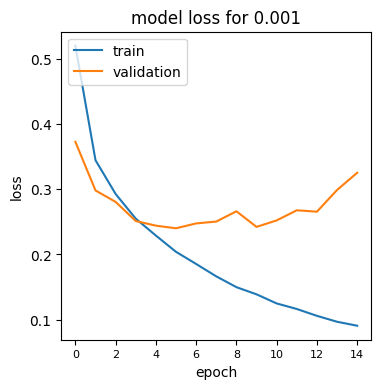

------Experimenting with Learning Rate -  0.0001 ------
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 dropout_7 (Dropout)         (None, 26, 26, 8)         0         
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 3872)              0       

<Figure size 400x400 with 0 Axes>

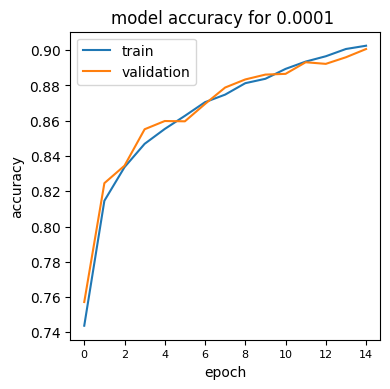

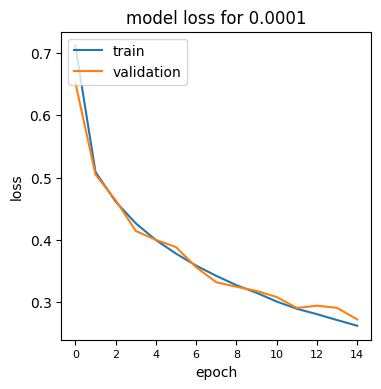

------Experimenting with Learning Rate -  1e-05 ------
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 dropout_8 (Dropout)         (None, 26, 26, 8)         0         
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 conv2d_22 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 3872)              0        

<Figure size 400x400 with 0 Axes>

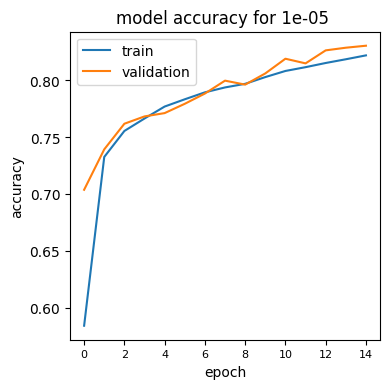

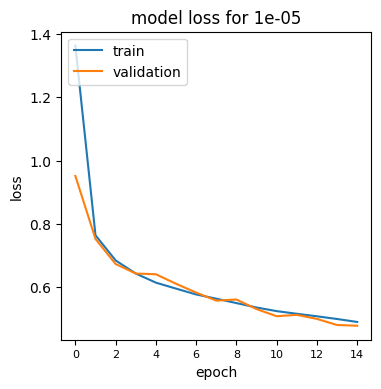

In [53]:
learning_rates = [0.01,1e-3, 1e-4, 1e-5]

def experiment_learning_rate(learning_rate):
  model = build_model_cnn(3)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  history = model.fit(x_train,  y_train_df, epochs=15, validation_data=(val_X, y_val_df), verbose=2)
  plt.figure(figsize=(4, 4))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f'model accuracy for {learning_rate} ')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.xticks(np.arange(0, len(history.history['loss']) , step=2), fontsize=8)
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  plt.figure(figsize=(4, 4))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(f'model loss for {learning_rate}')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.xticks(np.arange(0, len(history.history['loss']) , step=2), fontsize=8)

  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

learning_rates = [0.01,1e-3, 1e-4, 1e-5]
for lr in learning_rates:
  print(f'------Experimenting with Learning Rate -  {lr} ------')
  experiment_learning_rate(lr)

### TUNING FOR OPTIMAL EPOCHS

In [54]:
def build_model_cnn(num_layers):
    plt.figure(figsize=(8, 8))


    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Dropout(0.5))


    for i in range(1, num_layers):
        model.add(layers.Conv2D(16 * i, (3, 3), activation='relu'))



    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    print(model.summary())

    return model


In [55]:
model = build_model_cnn(3)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history = model.fit(x_train,  y_train_df, epochs=50, validation_data=(val_X, y_val_df), verbose=2)



Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 dropout_9 (Dropout)         (None, 26, 26, 8)         0         
                                                                 
 conv2d_24 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 conv2d_25 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 3872)              0         
                                                     

<Figure size 800x800 with 0 Axes>

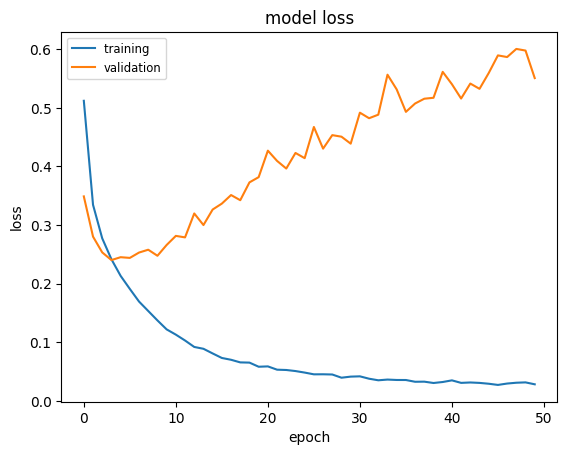

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training ', 'validation'], loc='upper left',fontsize='small')
plt.show()

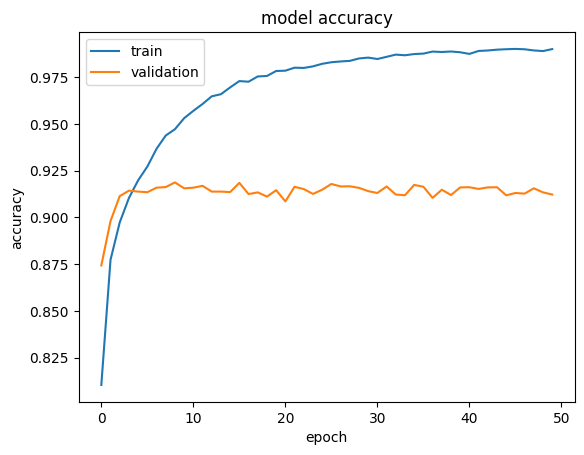

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### FINAL CNN MODEL

In [90]:
def build_model_cnn(num_layers):
    plt.figure(figsize=(8, 8))


    model = models.Sequential()
    model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Dropout(0.5))


    for i in range(1, num_layers):
        model.add(layers.Conv2D(16 * i, (3, 3), activation='relu'))



    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))



    return model


In [91]:
final_model = build_model_cnn(3)
print(final_model.summary())
final_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history = final_model.fit(x_train,  y_train_df, epochs=10, validation_data=(val_X, y_val_df), verbose=2)





Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 dropout_11 (Dropout)        (None, 26, 26, 8)         0         
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 conv2d_31 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 11, 11, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_23 (Flatten)        (None, 3872)              0         
                                                     

<Figure size 800x800 with 0 Axes>

In [92]:
### Saving the model
final_model.save('final_model.keras')

In [61]:

from tensorflow.keras.models import load_model
final_model = load_model('final_model.keras')

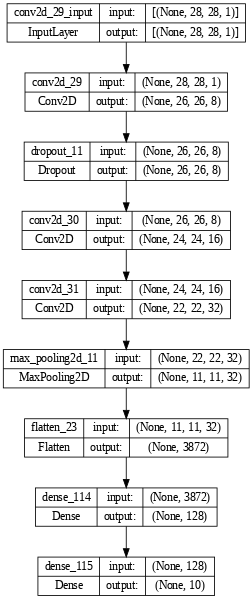

<Figure size 200x200 with 0 Axes>

In [93]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
plt.figure(figsize=(2, 2))
plot_model(final_model, to_file='final_model_plot.png', show_shapes=True, dpi=60)

### MAKING PREDICTIONS

In [94]:
test_loss, test_acc = final_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2595 - accuracy: 0.9179


In [64]:
test_labels.shape

(10000, 10)

In [65]:
y_pred_prob = final_model.predict(test_images)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 [==============================] - 1s 3ms/step


In [66]:
y_pred_prob.shape

(10000, 10)

In [67]:
y_pred.shape

(10000,)

In [68]:
test_labels

y_pred



array([9, 2, 1, ..., 8, 1, 5])

In [69]:
test_labels_ =test_labels.to_numpy()


In [70]:
test_labels_ = np.argmax(test_labels_, axis=1)


In [71]:
test_labels_

array([9, 2, 1, ..., 8, 1, 5])

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

y_pred_prob = final_model.predict(test_images)
y_pred = np.argmax(y_pred_prob, axis=1)

test_labels_ =test_labels.to_numpy()
test_labels_ = np.argmax(test_labels_, axis=1)

# additional metrics
precision = precision_score(test_labels_, y_pred, average='weighted')
recall = recall_score(test_labels_, y_pred, average='weighted')
f1 = f1_score(test_labels_, y_pred, average='weighted')

#  additional metrics
print("Final Model - Precision:", precision * 100)
print("Final Model - Recall:", recall * 100)
print("Final Model - F1 Score:", f1 * 100)
print("Final Model - F1 Score:", f1 * 100)

313/313 [==============================] - 1s 2ms/step
Final Model - Precision: 90.84142054942976
Final Model - Recall: 90.8
Final Model - F1 Score: 90.7356814485851
Final Model - F1 Score: 90.7356814485851


In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score



# class-wise precision
precision_per_class = precision_score(test_labels_, y_pred, average=None)

#  class-wise recall
recall_per_class = recall_score(test_labels_, y_pred, average=None)

# class-wise F1 score
f1_per_class = f1_score(test_labels_, y_pred, average=None)

# class-wise metrics
for class_label, (precision_value, recall_value, f1_value) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class)):
    print(f"Class {class_label} - Precision: {precision_value * 100:.2f}% | Recall: {recall_value * 100:.2f}% | F1 Score: {f1_value * 100:.2f}%")


Class 0 - Precision: 82.53% | Recall: 89.30% | F1 Score: 85.78%
Class 1 - Precision: 98.60% | Recall: 98.30% | F1 Score: 98.45%
Class 2 - Precision: 84.79% | Recall: 88.10% | F1 Score: 86.41%
Class 3 - Precision: 93.06% | Recall: 88.50% | F1 Score: 90.72%
Class 4 - Precision: 84.05% | Recall: 88.50% | F1 Score: 86.22%
Class 5 - Precision: 98.98% | Recall: 96.90% | F1 Score: 97.93%
Class 6 - Precision: 80.32% | Recall: 69.80% | F1 Score: 74.69%
Class 7 - Precision: 96.85% | Recall: 92.10% | F1 Score: 94.41%
Class 8 - Precision: 97.50% | Recall: 97.70% | F1 Score: 97.60%
Class 9 - Precision: 91.74% | Recall: 98.80% | F1 Score: 95.14%


In [74]:
from sklearn.metrics import classification_report

class_report = classification_report(test_labels_, y_pred, target_names=class_names)

print(class_report)


              precision    recall  f1-score   support

 T-shirt/top       0.83      0.89      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.88      0.86      1000
       Dress       0.93      0.89      0.91      1000
        Coat       0.84      0.89      0.86      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.80      0.70      0.75      1000
     Sneaker       0.97      0.92      0.94      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.92      0.99      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



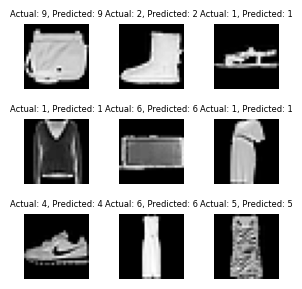

In [75]:

num_rows = 3
num_cols = 3
num_samples_to_display = num_rows * num_cols

sample_indices = np.random.choice(len(test_labels_), num_samples_to_display, replace=False)




fig, axes = plt.subplots(num_rows, num_cols, figsize=(3, 3))

for i, ax in enumerate(axes.flatten()):
    if i < num_samples_to_display:
         actual_class = test_labels_[i]
         predicted_class = y_pred[i]

        # Plot the test image
         ax.imshow(test_images[sample_indices[i]].reshape((28, 28)), cmap='gray')
         ax.set_title(f"Actual: {actual_class}, Predicted: {predicted_class}",fontsize=6)
         ax.axis('off')  # Turn off axis labels for cleaner display
    else:
        ax.axis('off')  # Turn off empty subplots

plt.tight_layout()
plt.show()


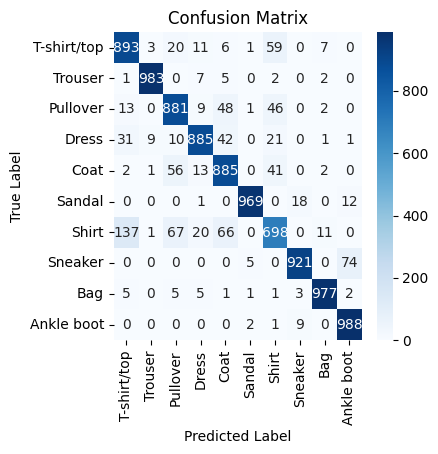

In [82]:
conf_matrix = confusion_matrix(test_labels_, y_pred)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# MODEL INTERPRETABILITY




In [83]:
train_images_expanded = np.expand_dims(train_images, axis=-1)
final_model

In [84]:
final_model.summary()
model.save_weights('my_model_weights.h5')

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 dropout_10 (Dropout)        (None, 26, 26, 8)         0         
                                                                 
 conv2d_27 (Conv2D)          (None, 24, 24, 16)        1168      
                                                                 
 conv2d_28 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 11, 11, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_22 (Flatten)        (None, 3872)              0         
                                                     

In [85]:
x_inference = x_train[:400]
x_inference.shape

(400, 28, 28, 1)

13/13 [==============================] - 0s 2ms/step


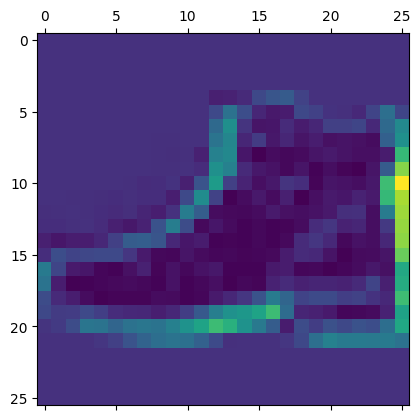

In [86]:
import matplotlib.pyplot as plt

image_num = 5
layer_num = -8


last_conv_layer = final_model.get_layer(index=layer_num)
last_conv_layer_model = tf.keras.Model(inputs=final_model.input, outputs=last_conv_layer.output)


conv_output = last_conv_layer_model.predict(x_inference)


heatmap = np.mean(conv_output, axis=-1)

heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

plt.matshow(heatmap[image_num])
plt.show()


13/13 [==============================] - 0s 2ms/step


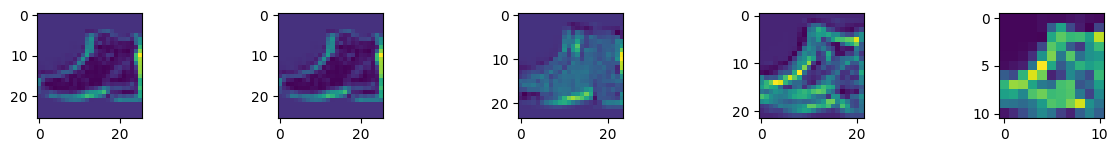

In [87]:
import matplotlib.pyplot as plt
import numpy as np

image_num = 5
layer_indices = [-8, -7, -6, -5, -4]

plt.figure(figsize=(15, 3))

for i, layer_num in enumerate(layer_indices, 1):
    last_conv_layer = final_model.get_layer(index=layer_num)
    last_conv_layer_model = tf.keras.Model(inputs=final_model.input, outputs=last_conv_layer.output)

    conv_output = last_conv_layer_model.predict(x_inference)

    heatmap = np.mean(conv_output, axis=-1)


    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)


    plt.subplot(2, len(layer_indices), i)
    plt.imshow(heatmap[image_num], cmap='viridis')  # Use a different colormap for better visibility


plt.show()


13/13 [==============================] - 0s 3ms/step


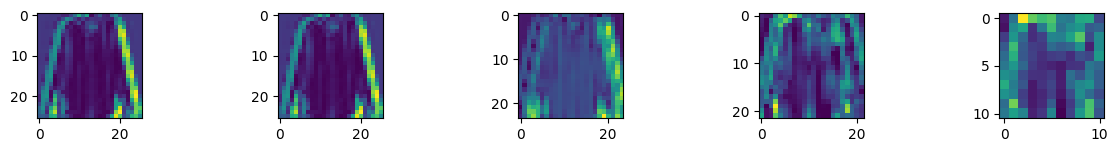

In [88]:
import matplotlib.pyplot as plt
import numpy as np

image_num = 33
layer_indices = [-8, -7, -6, -5, -4]
plt.figure(figsize=(15, 3))

for i, layer_num in enumerate(layer_indices, 1):
    last_conv_layer = final_model.get_layer(index=layer_num)
    last_conv_layer_model = tf.keras.Model(inputs=final_model.input, outputs=last_conv_layer.output)


    conv_output = last_conv_layer_model.predict(x_inference)


    heatmap = np.mean(conv_output, axis=-1)


    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    plt.subplot(2, len(layer_indices), i)
    plt.imshow(heatmap[image_num], cmap='viridis')  # Use a different colormap for better visibility


plt.show()
